Text(0.5, 0.92, 'Bayesian Model and ERM logistic model plane comparison')

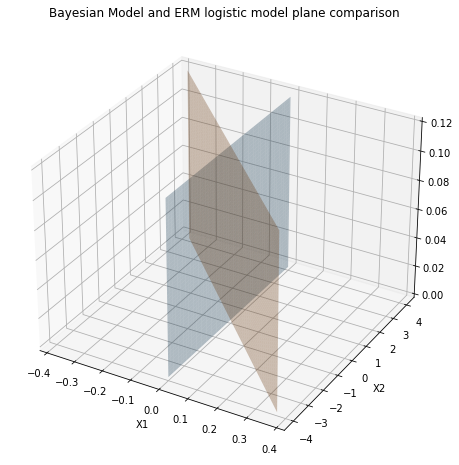

In [34]:
import numpy as np
import matplotlib.pyplot as plt
n=5000
#taking 5000 samples
z=np.zeros((2,n))
x2=np.zeros((2,n))
b=np.array([[1],[1]])                                        
A=np.array([[1,0],[0,1.414]])   

for i in range(n):
    z[:,i]=np.random.randn(2)
x2=np.dot(A,z)+b

#taking 5000 samples 
z1=np.zeros((2,n))
x1=np.zeros((2,n))
b1=np.array([[-1],[1]])
A1=np.array([[1,0],[0,1.414]])
for i in range(n):
    z1[:,i]=np.random.randn(2)
x1=np.dot(A1,z1)+b1

#taking y values
y1=np.full(
  shape=5000,
  fill_value=-1,
  dtype=int
)
y1=y1.reshape(n,1)

#taking y values
y2=np.full(
  shape=5000,
  fill_value=1,
    dtype=int
)
y2=y2.reshape(n,1)

x=np.concatenate((x2, x1), axis=1)
y=np.concatenate((y1, y2), axis=0)

lam=0.01
converged=False
b=0
N=0.01   #0.001
count=0
sum=np.array([[0],[0]])
bias=0

# gradient descent for 100 times
for i in range(100):
    w=np.random.rand(2,1)  
    b=np.random.rand(1)
    converged=False
    #convergence of gradient descent
    while not converged:
        U=1/(1+np.exp(-y*(b+np.dot(x.T,w))))
        lo=(x.T*((U-1)*y))
        p=np.sum(lo,axis=0).reshape(2,1)/10000 +2*lam*w
        wt=w-N*(p)
        epsilon=np.absolute(wt-w)
        epsilon=epsilon.reshape(-1)
        w=wt[:]

        #train b 
        U=1/(1+np.exp(-y*(b+np.dot(x.T,w))))
        bt=b - N*(U-1)*y/10000
        b=bt[:]

        converged=True
        for i in range(2):
            if epsilon[i]>0.0001:
                converged=False
                break
                
        #cost function   # cehecking cost whether it is decreasing
        J=lam*np.linalg.norm(w, ord=2)**2 +(np.sum(np.log(1+np.exp(np.multiply(-y,(b+np.dot(x.T,w)))))))/10000
        bia=np.mean(b)
    
    bias=bias+bia
    sum=sum+w
    count=count+1
bias=bias/100       
sum=sum/100

y_sep = np.linspace(-4,4,100)  
Z = np.linspace(0,0.12,100)
y_sep,Z = np.meshgrid(y_sep,Z)
x_sep = y_sep*0
x_sep1=-werm_opt[1,0]*y_sep/werm_opt[0,0]
fig = plt.figure(figsize=(16,8)) 
ax = plt.axes(projection='3d')
ax.plot_surface(x_sep,y_sep,Z,alpha=0.3,label='Bayesian model')
ax.plot_surface(x_sep1,y_sep,Z,alpha=0.3,label='ERM logistic model')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Bayesian Model and ERM logistic model plane comparison')
